In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
##reading dataset
housing=pd.read_csv(r'F:\Upgrad\ML2\Advanced Regression\Housing price pred assignment\train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##looking at shape
housing.shape

(1460, 81)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Missing Values Treatment

In [7]:
##checking null values
##remove those columns having more null values(40%)
round((100*housing.isnull().sum()/housing.shape[0]),2).sort_values(ascending=False).head(15)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
dtype: float64

In [8]:
housing.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1,inplace=True)

In [9]:
housing.shape

(1460, 76)

In [10]:
round((100*housing.isnull().sum()/housing.shape[0]),2).sort_values(ascending=False).head(60)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

In [11]:
housing.shape

(1460, 76)

In [12]:
round((100*housing.isnull().sum()/housing.shape[0]),2).sort_values(ascending=False).head(60)

LotFrontage      17.74
GarageFinish      5.55
GarageType        5.55
GarageCond        5.55
GarageQual        5.55
GarageYrBlt       5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
RoofStyle         0.00
RoofMatl          0.00
SalePrice         0.00
Exterior1st       0.00
Exterior2nd       0.00
YearBuilt         0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
YearRemodAdd      0.00
BldgType          0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
MSSubClass        0.00
BsmtFinSF1        0.00
TotalBsmtSF       0.00
BsmtFinSF2        0.00
EnclosedPor

In [13]:
housing=housing[~housing['LotFrontage'].isnull()]

In [14]:
round((100*housing.isnull().sum()/housing.shape[0]),2).sort_values(ascending=False).head(60)

GarageType       6.16
GarageYrBlt      6.16
GarageFinish     6.16
GarageCond       6.16
GarageQual       6.16
BsmtExposure     2.66
BsmtFinType2     2.66
BsmtFinType1     2.58
BsmtCond         2.58
BsmtQual         2.58
MasVnrType       0.50
MasVnrArea       0.50
Electrical       0.08
RoofMatl         0.00
RoofStyle        0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
YearRemodAdd     0.00
BldgType         0.00
OverallCond      0.00
LandContour      0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
Utilities        0.00
OverallQual      0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
HouseStyle       0.00
BsmtFinSF1       0.00
TotalBsmtSF      0.00
BsmtFinSF2       0.00
EnclosedPorch    0.00
Fireplaces       0.00
GarageCars

In [15]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
##drop id column
housing.drop(['Id'],axis=1,inplace=True)

In [17]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [18]:
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1195.000000,1201.000000,1201.000000,...,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,57.198168,70.049958,9951.698585,6.122398,5.562032,1970.580350,1985.189842,102.703766,427.063281,42.975853,...,89.288926,45.954205,22.731057,3.125729,15.028310,2.739384,25.490425,6.342215,2007.802664,180770.480433
std,43.106427,24.284752,7924.353975,1.419216,1.094543,31.750335,21.196948,185.404454,464.589556,154.493463,...,120.383224,66.078038,61.659820,28.775134,55.986122,38.865124,189.782665,2.703755,1.330486,83389.519866
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7420.000000,5.000000,5.000000,1950.000000,1966.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,127500.000000
50%,50.000000,69.000000,9262.000000,6.000000,5.000000,1972.000000,1995.000000,0.000000,352.000000,0.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,159500.000000
75%,70.000000,80.000000,11249.000000,7.000000,6.000000,2003.000000,2004.000000,160.000000,690.000000,0.000000,...,168.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,648.000000,3500.000000,12.000000,2010.000000,755000.000000


In [19]:
housing['GarageYrBlt'].describe()

count    1127.000000
mean     1978.543035
std        25.828916
min      1900.000000
25%      1960.000000
50%      1981.000000
75%      2003.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [20]:
##getting ages using current year
from datetime import datetime
currentyear = datetime.now().year
housing['YearBuilt_Old'] = currentyear-housing.YearBuilt
housing['YearRemodAdd_Old'] = currentyear-housing.YearRemodAdd
housing['GarageYrBlt_Old'] = currentyear-housing.GarageYrBlt
housing['YrSold_Old'] = currentyear-housing.YrSold
housing.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'],axis=1,inplace=True)
housing[['YearBuilt_Old','YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old']].head(10)

,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
0,17,17,17.0,12
1,44,44,44.0,13
2,19,18,19.0,12
3,105,50,22.0,14
4,20,20,20.0,12
5,27,25,27.0,11
6,16,15,16.0,13
8,89,70,89.0,12
9,81,70,81.0,12
10,55,55,55.0,12


In [21]:
housing.shape

(1201, 75)

In [22]:
housing['YearBuilt_Old'].value_counts()

14     67
15     64
13     49
16     47
17     38
       ..
116     1
122     1
127     1
138     1
10      1
Name: YearBuilt_Old, Length: 112, dtype: int64

In [23]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1201.0,57.198168,43.106427,20.0,20.0,50.0,70.0,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1201.0,9951.698585,7924.353975,1300.0,7420.0,9262.0,11249.0,215245.0
OverallQual,1201.0,6.122398,1.419216,1.0,5.0,6.0,7.0,10.0
OverallCond,1201.0,5.562032,1.094543,2.0,5.0,5.0,6.0,9.0
MasVnrArea,1195.0,102.703766,185.404454,0.0,0.0,0.0,160.0,1600.0
BsmtFinSF1,1201.0,427.063281,464.589556,0.0,0.0,352.0,690.0,5644.0
BsmtFinSF2,1201.0,42.975853,154.493463,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1201.0,589.345545,448.699065,0.0,245.0,506.0,833.0,2336.0
TotalBsmtSF,1201.0,1059.384679,448.307125,0.0,784.0,990.0,1309.0,6110.0


In [24]:
round((100*housing.isnull().sum()/housing.shape[0]),2).sort_values(ascending=False).head(60)

GarageFinish        6.16
GarageCond          6.16
GarageYrBlt_Old     6.16
GarageType          6.16
GarageQual          6.16
BsmtFinType2        2.66
BsmtExposure        2.66
BsmtFinType1        2.58
BsmtCond            2.58
BsmtQual            2.58
MasVnrArea          0.50
MasVnrType          0.50
Electrical          0.08
RoofMatl            0.00
Exterior1st         0.00
Foundation          0.00
Exterior2nd         0.00
ExterQual           0.00
ExterCond           0.00
BsmtFinSF1          0.00
RoofStyle           0.00
YrSold_Old          0.00
BsmtUnfSF           0.00
OverallCond         0.00
MSZoning            0.00
LotFrontage         0.00
LotArea             0.00
Street              0.00
LotShape            0.00
LandContour         0.00
Utilities           0.00
LotConfig           0.00
LandSlope           0.00
Neighborhood        0.00
Condition1          0.00
Condition2          0.00
BldgType            0.00
HouseStyle          0.00
OverallQual         0.00
BsmtFinSF2          0.00


In [25]:
housing['GarageType'].isnull().sum()

74

- Here we have null values which given as NA means no,so it is better to impute them with a most occuring category instead of filling with 'NA' which create unnecessary dummy varible if it is nominal while encoding

In [26]:
##lets fill null values
housing['BsmtFinType2'].fillna('Unf',inplace=True)
housing['GarageCond'].fillna('TA',inplace=True)
housing['GarageType'].fillna('Attchd',inplace=True)
housing['BsmtExposure'].fillna('No',inplace=True)
housing['GarageYrBlt_Old'].fillna(-1,inplace=True)
housing['GarageQual'].fillna('TA',inplace=True)
housing['GarageFinish'].fillna('Fin',inplace=True)
housing['BsmtCond'].fillna('TA',inplace=True)
housing['BsmtFinType1'].fillna('GLQ',inplace=True)
housing['BsmtQual'].fillna('Gd',inplace=True)
housing['MasVnrType'].fillna('None',inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].median(),inplace=True)

In [27]:
#lets check null values again

round((100*housing.isnull().sum()/housing.shape[0]),2).sort_values(ascending=False).head(60)

Electrical          0.08
YrSold_Old          0.00
BsmtCond            0.00
Exterior2nd         0.00
MasVnrType          0.00
MasVnrArea          0.00
ExterQual           0.00
ExterCond           0.00
Foundation          0.00
BsmtQual            0.00
BsmtExposure        0.00
HeatingQC           0.00
BsmtFinType1        0.00
BsmtFinSF1          0.00
BsmtFinType2        0.00
BsmtFinSF2          0.00
BsmtUnfSF           0.00
TotalBsmtSF         0.00
Exterior1st         0.00
RoofMatl            0.00
RoofStyle           0.00
OverallCond         0.00
MSZoning            0.00
LotFrontage         0.00
LotArea             0.00
Street              0.00
LotShape            0.00
LandContour         0.00
Utilities           0.00
LotConfig           0.00
LandSlope           0.00
Neighborhood        0.00
Condition1          0.00
Condition2          0.00
BldgType            0.00
HouseStyle          0.00
OverallQual         0.00
Heating             0.00
CentralAir          0.00
GarageYrBlt_Old     0.00


In [28]:
housing.shape

(1201, 75)

In [29]:
##lets plot coreation matrix to know which varibles are corelted with SalePrice
corr_matrix=housing.corr()

In [30]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.802287
GrLivArea           0.703557
GarageCars          0.647302
GarageArea          0.631761
TotalBsmtSF         0.626977
1stFlrSF            0.620159
FullBath            0.566800
TotRmsAbvGrd        0.537215
MasVnrArea          0.492084
Fireplaces          0.479353
BsmtFinSF1          0.403195
LotFrontage         0.351799
WoodDeckSF          0.345054
OpenPorchSF         0.326530
LotArea             0.311416
2ndFlrSF            0.308957
HalfBath            0.284770
BsmtFullBath        0.237637
BsmtUnfSF           0.215044
BedroomAbvGr        0.164554
ScreenPorch         0.121166
PoolArea            0.092924
MoSold              0.052422
3SsnPorch           0.035755
YrSold_Old          0.020601
BsmtFinSF2         -0.017682
LowQualFinSF       -0.022339
BsmtHalfBath       -0.028450
MiscVal            -0.049435
MSSubClass         -0.099311
OverallCond        -0.112568
KitchenAbvGr       -0.140626
EnclosedPorch      -0.164004
GarageYrBlt_Ol

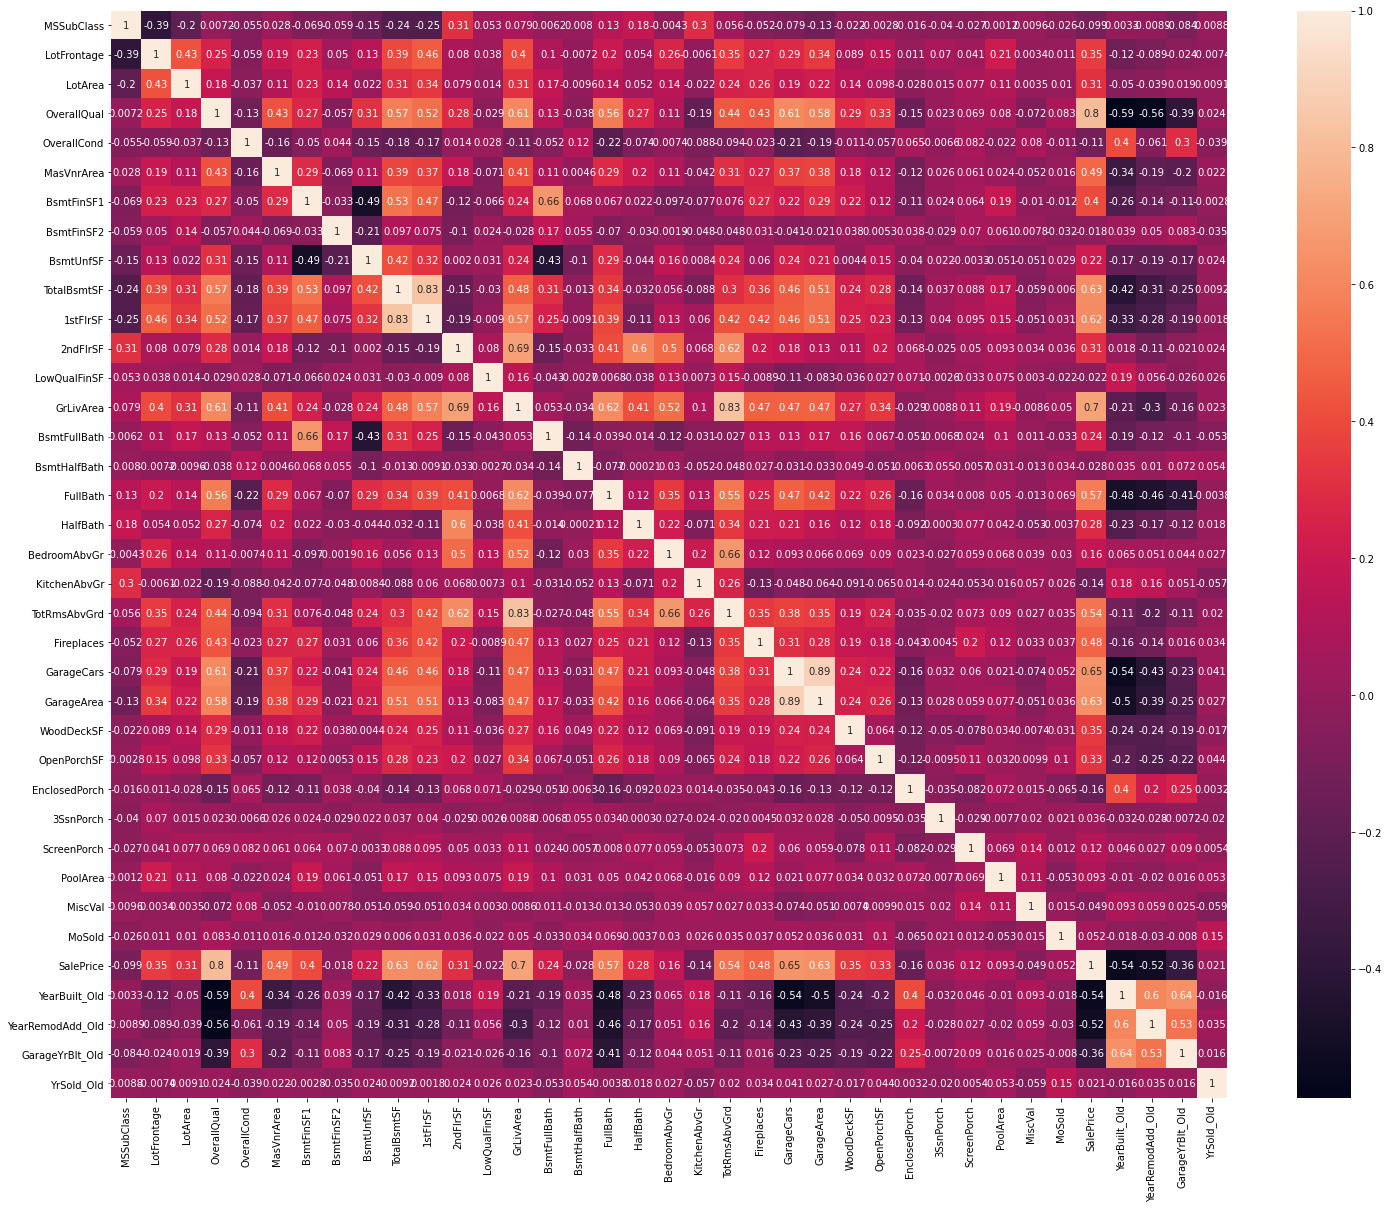

In [31]:
plt.figure(figsize=(25,20))
sns.heatmap(housing.corr(),annot=True)


In [32]:
housing['GarageArea'].describe()

count    1201.000000
mean      472.444629
std       221.173202
min         0.000000
25%       309.000000
50%       480.000000
75%       578.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [33]:
housing.shape

(1201, 75)

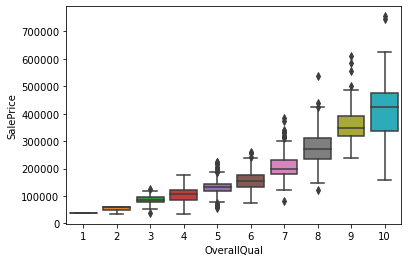

In [34]:
sns.boxplot(housing['OverallQual'],housing['SalePrice'])

In [35]:
housing.shape

(1201, 75)

In [36]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1201.0,57.198168,43.106427,20.0,20.0,50.0,70.0,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1201.0,9951.698585,7924.353975,1300.0,7420.0,9262.0,11249.0,215245.0
OverallQual,1201.0,6.122398,1.419216,1.0,5.0,6.0,7.0,10.0
OverallCond,1201.0,5.562032,1.094543,2.0,5.0,5.0,6.0,9.0
MasVnrArea,1201.0,102.190674,185.082183,0.0,0.0,0.0,160.0,1600.0
BsmtFinSF1,1201.0,427.063281,464.589556,0.0,0.0,352.0,690.0,5644.0
BsmtFinSF2,1201.0,42.975853,154.493463,0.0,0.0,0.0,0.0,1474.0
BsmtUnfSF,1201.0,589.345545,448.699065,0.0,245.0,506.0,833.0,2336.0
TotalBsmtSF,1201.0,1059.384679,448.307125,0.0,784.0,990.0,1309.0,6110.0


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1201 non-null   int64  
 1   MSZoning          1201 non-null   object 
 2   LotFrontage       1201 non-null   float64
 3   LotArea           1201 non-null   int64  
 4   Street            1201 non-null   object 
 5   LotShape          1201 non-null   object 
 6   LandContour       1201 non-null   object 
 7   Utilities         1201 non-null   object 
 8   LotConfig         1201 non-null   object 
 9   LandSlope         1201 non-null   object 
 10  Neighborhood      1201 non-null   object 
 11  Condition1        1201 non-null   object 
 12  Condition2        1201 non-null   object 
 13  BldgType          1201 non-null   object 
 14  HouseStyle        1201 non-null   object 
 15  OverallQual       1201 non-null   int64  
 16  OverallCond       1201 non-null   int64  


In [38]:
housing['PavedDrive'].value_counts()

Y    1095
N      81
P      25
Name: PavedDrive, dtype: int64

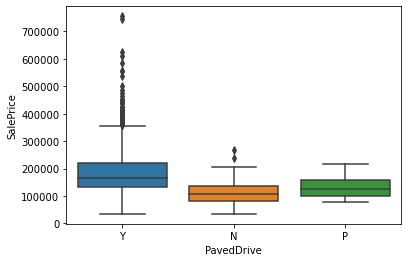

In [39]:
sns.boxplot(housing['PavedDrive'],housing['SalePrice'])

In [40]:
cat_col=list(housing.dtypes[housing.dtypes =='object'].index)

In [41]:
housing[cat_col].head(10).T

,0,1,2,3,4,5,6,8,9,10
MSZoning,RL,RL,RL,RL,RL,RL,RL,RM,RL,RL
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
LotShape,Reg,Reg,IR1,IR1,IR1,IR1,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,Inside,FR2,Inside,Corner,FR2,Inside,Inside,Inside,Corner,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,CollgCr,Veenker,CollgCr,Crawfor,NoRidge,Mitchel,Somerst,OldTown,BrkSide,Sawyer
Condition1,Norm,Feedr,Norm,Norm,Norm,Norm,Norm,Artery,Artery,Norm
Condition2,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Norm,Artery,Norm


In [42]:
housing['MSZoning'].value_counts()


RL         922
RM         199
FV          57
RH          13
C (all)     10
Name: MSZoning, dtype: int64

In [43]:
housing['LandSlope'].value_counts()

Gtl    1148
Mod      48
Sev       5
Name: LandSlope, dtype: int64

In [44]:
housing['ExterQual'].value_counts()

TA    737
Gd    404
Ex     47
Fa     13
Name: ExterQual, dtype: int64

## Odinal Data

In [45]:
housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


In [46]:
housing['LandSlope']=housing['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing['ExterQual']=housing['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['BsmtQual']=housing['BsmtQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtCond']=housing['BsmtCond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['BsmtExposure']=housing['BsmtExposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing['BsmtFinType1']=housing['BsmtFinType1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['BsmtFinType2']=housing['BsmtFinType2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing['HeatingQC']=housing['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['CentralAir']=housing['CentralAir'].map({'N':0,'Y':1})
housing['KitchenQual']=housing['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['GarageFinish']=housing['GarageFinish'].map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
housing['GarageQual']=housing['GarageQual'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['GarageCond']=housing['GarageCond'].map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing['ExterCond']=housing['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing['LotShape']=housing['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})


In [47]:
housing[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond','ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,0,3,4,3,1,6,1,4,1,3,2,3,3,2,3
1,0,2,4,3,4,5,1,4,1,2,2,3,3,2,3
2,0,3,4,3,2,6,1,4,1,3,2,3,3,2,0
3,0,2,3,4,1,5,1,3,1,3,1,3,3,2,0
4,0,3,4,3,3,6,1,4,1,3,2,3,3,2,0


## Nominal Data

In [48]:
housing[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','Street']].head()

,MSZoning,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,MasVnrType,Foundation,Heating,Electrical,Functional,GarageType,PavedDrive,SaleType,SaleCondition,Street
0,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal,Pave
1,RL,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,None,CBlock,GasA,SBrkr,Typ,Attchd,Y,WD,Normal,Pave
2,RL,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal,Pave
3,RL,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,None,BrkTil,GasA,SBrkr,Typ,Detchd,Y,WD,Abnorml,Pave
4,RL,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,BrkFace,PConc,GasA,SBrkr,Typ,Attchd,Y,WD,Normal,Pave


In [49]:
dummy=pd.get_dummies(housing[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','Street']],drop_first=True)
housing=pd.concat([housing,dummy],axis=1)
housing.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation','Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition','Street','Utilities'],axis=1,inplace=True)


In [50]:
corr_mat=housing.corr()
corr_mat['SalePrice'].sort_values(ascending=False).head(20)

SalePrice               1.000000
OverallQual             0.802287
ExterQual               0.707185
GrLivArea               0.703557
KitchenQual             0.675494
GarageCars              0.647302
BsmtQual                0.644143
GarageArea              0.631761
TotalBsmtSF             0.626977
1stFlrSF                0.620159
FullBath                0.566800
TotRmsAbvGrd            0.537215
Foundation_PConc        0.527169
MasVnrArea              0.492084
Fireplaces              0.479353
HeatingQC               0.450755
Neighborhood_NridgHt    0.428442
GarageFinish            0.412706
BsmtFinSF1              0.403195
BsmtExposure            0.386286
Name: SalePrice, dtype: float64

In [51]:
housing.shape

(1201, 192)

In [52]:
##checking if there are any categorical variables
list(housing.dtypes[housing.dtypes =='object'].index)

[]

In [53]:
housing.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Street_Pave'],
      dtype='object', length=192)

## Univariate Analysis

In [54]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1201.0,57.198168,43.106427,20.0,20.0,50.0,70.0,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
LotArea,1201.0,9951.698585,7924.353975,1300.0,7420.0,9262.0,11249.0,215245.0
LotShape,1201.0,2.159034,1.327474,0.0,0.0,3.0,3.0,3.0
LandSlope,1201.0,0.048293,0.233093,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...
SaleCondition_Alloca,1201.0,0.008326,0.090906,0.0,0.0,0.0,0.0,1.0
SaleCondition_Family,1201.0,0.014988,0.121553,0.0,0.0,0.0,0.0,1.0
SaleCondition_Normal,1201.0,0.800167,0.400042,0.0,1.0,1.0,1.0,1.0
SaleCondition_Partial,1201.0,0.103247,0.304408,0.0,0.0,0.0,0.0,1.0


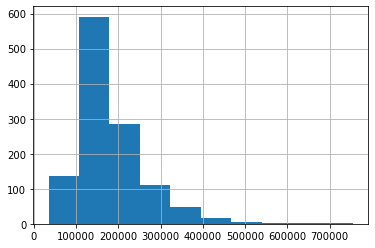

In [55]:
##lets look at our target varible
housing['SalePrice'].hist()
plt.show()

In [56]:
housing=housing[housing.SalePrice<=400000]

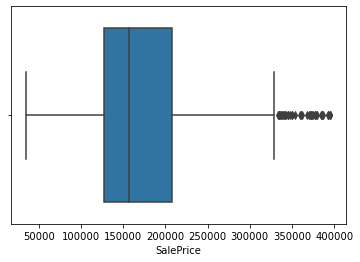

In [57]:
sns.boxplot(housing['SalePrice'])
plt.show()

In [58]:
housing['SalePrice'].describe()

count      1175.000000
mean     173851.629787
std       68400.941816
min       34900.000000
25%      127000.000000
50%      157000.000000
75%      207900.000000
max      395192.000000
Name: SalePrice, dtype: float64

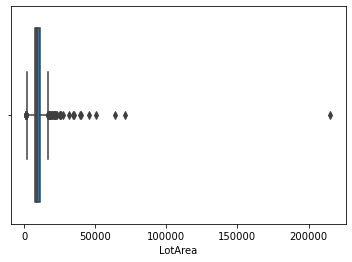

In [59]:
sns.boxplot(housing['LotArea'])

In [60]:
##remove outlier
housing=housing[housing['LotArea']<50000]

In [61]:
housing['LotArea'].describe()

count     1171.000000
mean      9446.344150
std       4119.996949
min       1300.000000
25%       7323.000000
50%       9179.000000
75%      11057.000000
max      45600.000000
Name: LotArea, dtype: float64

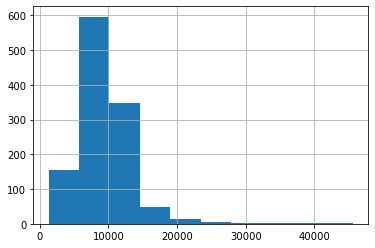

In [62]:
housing['LotArea'].hist()

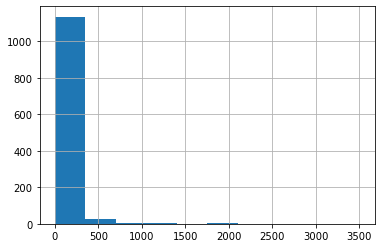

In [63]:
housing['MiscVal'].hist()

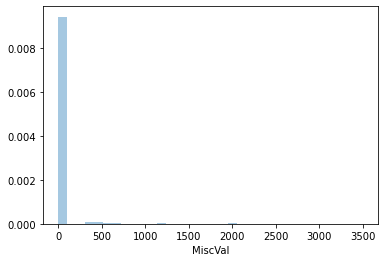

In [64]:
sns.distplot(housing['MiscVal'])

In [65]:
housing=housing[housing['MiscVal']<=500]

In [66]:
housing['MiscVal'].describe()

count    1154.000000
mean        7.265165
std        56.109057
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       500.000000
Name: MiscVal, dtype: float64

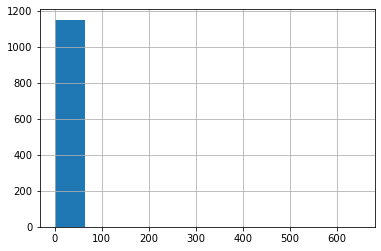

In [67]:
housing['PoolArea'].hist()

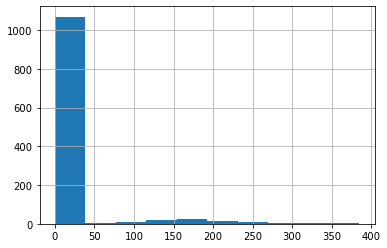

In [68]:
housing['ScreenPorch'].hist()

## Multivariate Analysis

In [69]:
corr_matr=housing.corr()

In [70]:
corr_matr['SalePrice'].sort_values(ascending=False)


SalePrice            1.000000
OverallQual          0.813961
ExterQual            0.710215
KitchenQual          0.676661
GrLivArea            0.670115
                       ...   
GarageType_Detchd   -0.387473
Foundation_CBlock   -0.392496
MasVnrType_None     -0.416364
YearRemodAdd_Old    -0.566417
YearBuilt_Old       -0.587641
Name: SalePrice, Length: 192, dtype: float64

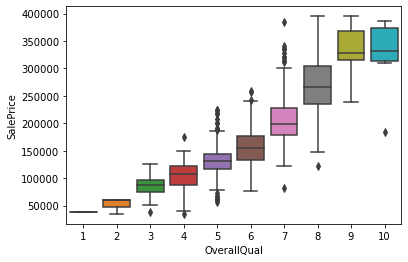

In [71]:
sns.boxplot(housing['OverallQual'],housing['SalePrice'])

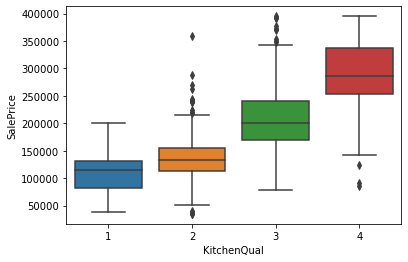

In [72]:
sns.boxplot(housing['KitchenQual'],housing['SalePrice'])

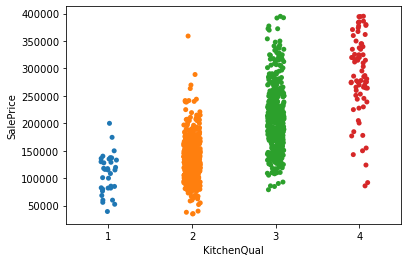

In [73]:
sns.stripplot(housing['KitchenQual'],housing['SalePrice'])

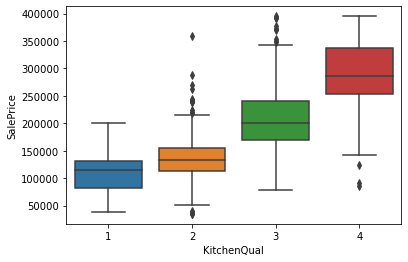

In [74]:
sns.boxplot(housing['KitchenQual'],housing['SalePrice'])

## segmented univariate analysis

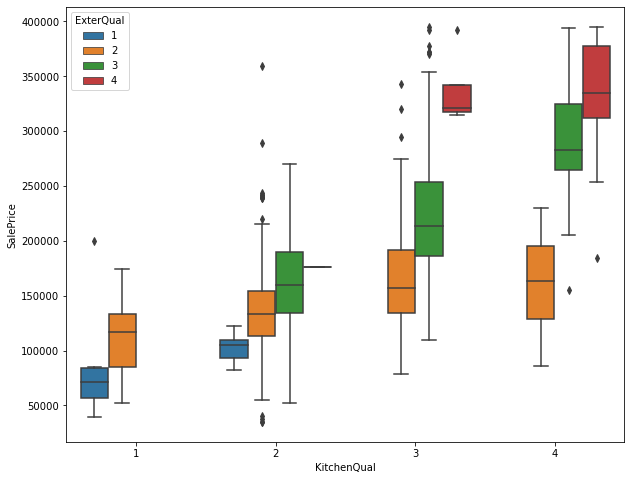

In [75]:
plt.figure(figsize=(10,8))
sns.boxplot(housing['KitchenQual'],housing['SalePrice'],hue=housing['ExterQual'])

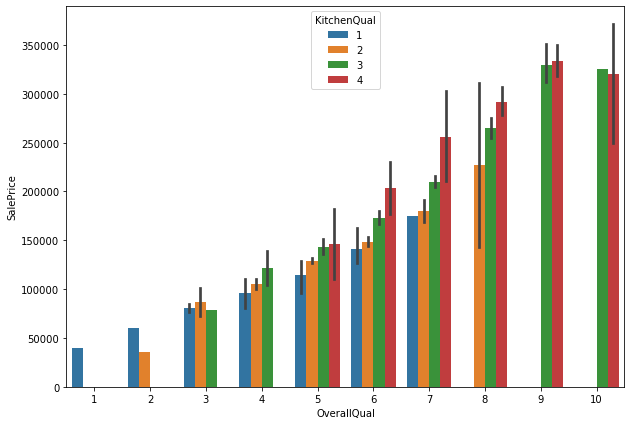

In [76]:
plt.figure(figsize=(10,7))
sns.barplot(housing['OverallQual'],housing['SalePrice'],hue=housing['KitchenQual'])

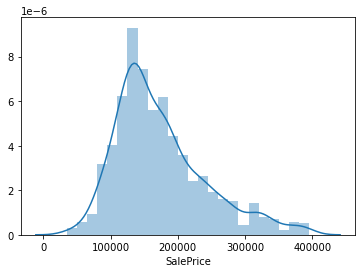

In [77]:
##lets look at distribution of SalePrice
sns.distplot(housing['SalePrice'])


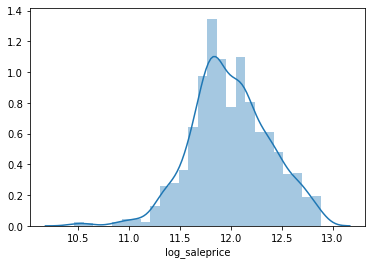

In [78]:
##converting SalePrice variable into log form to make it look like normally distributed
housing['log_saleprice']=np.log(housing['SalePrice'])
sns.distplot(housing['log_saleprice'])

In [79]:
##drop original SalePrice
housing.drop('SalePrice',axis=1,inplace=True)

In [80]:
#housing['SalePrice'].describe()

In [81]:
##train,test split
from sklearn.model_selection import train_test_split

In [82]:
df_train,df_test=train_test_split(housing,train_size=0.7,random_state=100)

In [83]:
df_train.shape

(807, 192)

In [84]:
df_test.shape

(347, 192)

In [85]:
housing.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Pave,log_saleprice
0,60,65.0,8450,3,0,7,5,196.0,3,2,...,0,0,1,0,0,0,1,0,1,12.247694
1,20,80.0,9600,3,0,6,8,0.0,2,2,...,0,0,1,0,0,0,1,0,1,12.109011
2,60,68.0,11250,0,0,7,5,162.0,3,2,...,0,0,1,0,0,0,1,0,1,12.317167
3,70,60.0,9550,0,0,7,5,0.0,2,2,...,0,0,1,0,0,0,0,0,1,11.849398
4,60,84.0,14260,0,0,8,5,350.0,3,2,...,0,0,1,0,0,0,1,0,1,12.429216


In [86]:
##scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
##as our dependent variable sacle is different from independent varibles we will aslo scale dependent variable 
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond','LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YearBuilt_Old','YearRemodAdd_Old','GarageYrBlt_Old','YrSold_Old']


In [87]:
df_train[num_col]=scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

In [88]:
df_train.head()

,MSSubClass,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Street_Pave,log_saleprice
549,0.235294,0.335404,0.182280,3,0,0.625,0.428571,0.0,3,2,...,0,0,1,0,0,0,1,0,1,12.479909
578,0.823529,0.080745,0.052009,3,0,0.625,0.428571,0.0,3,2,...,0,0,1,0,0,0,0,0,1,11.891362
394,0.176471,0.242236,0.199413,3,0,0.375,0.571429,0.0,2,2,...,0,0,1,0,0,0,1,0,1,11.599103
501,0.235294,0.335404,0.191941,3,0,0.625,0.428571,0.0,3,2,...,0,0,1,0,0,0,1,0,1,12.331383
1308,0.000000,0.490683,0.241535,3,0,0.375,0.714286,0.0,2,2,...,0,0,1,0,0,0,1,0,1,11.898188


In [89]:
y_train=df_train.pop('log_saleprice')
print(y_train)
y_train.shape

549     12.479909
578     11.891362
394     11.599103
501     12.331383
1308    11.898188
          ...    
1010    11.813030
67      12.328290
438     11.411446
96      12.273731
998     11.418615
Name: log_saleprice, Length: 807, dtype: float64


(807,)

In [90]:
X_train=df_train
X_train.shape

(807, 191)

## Model Building

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [92]:
lm=LinearRegression()
lm.fit(X_train,y_train)
rfe=RFE(lm,70)
rfe=rfe.fit(X_train,y_train)


In [93]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 33),
 ('LotFrontage', True, 1),
 ('LotArea', True, 1),
 ('LotShape', False, 99),
 ('LandSlope', False, 87),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 116),
 ('ExterQual', False, 106),
 ('ExterCond', False, 74),
 ('BsmtQual', False, 95),
 ('BsmtCond', False, 78),
 ('BsmtExposure', False, 92),
 ('BsmtFinType1', False, 93),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 118),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 88),
 ('CentralAir', False, 9),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 36),
 ('FullBath', False, 8),
 ('HalfBath', False, 40),
 ('BedroomAbvGr', False, 64),
 ('KitchenAbvGr', False, 25),
 ('KitchenQual', False, 76),
 ('TotRmsAbvGrd', False, 84),
 ('Fireplaces', False, 4),
 ('GarageFinish', False, 115),
 ('GarageCars', True, 1),
 ('GarageArea', T

In [94]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'ScreenPorch', 'YearBuilt_Old', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NridgHt', 'Neighborhood_SWISU', 'Neighborhood_StoneBr',
       'Condition1_Norm', 'Condition1_PosN', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_PosA',
       'Condition2_PosN', 'BldgType_Twnhs', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exteri

In [95]:
X_train.columns[~rfe.support_]


Index(['MSSubClass', 'LotShape', 'LandSlope', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       ...
       'PavedDrive_P', 'PavedDrive_Y', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Family', 'SaleCondition_Partial'],
      dtype='object', length=121)

In [96]:
##test set
df_test[num_col].head()

,MSSubClass,LotArea,OverallQual,OverallCond,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YearBuilt_Old,YearRemodAdd_Old,GarageYrBlt_Old,YrSold_Old
1236,0.823529,0.029977,0.625,0.428571,0.093168,0.093888,0.000000,0.000000,0.374143,0.243467,...,0.051625,0.0,0.0,0.0,0.0,0.0,0.044776,0.116667,0.148760,0.00
435,0.235294,0.211445,0.625,0.571429,0.136646,0.000000,0.170354,0.305235,0.034280,0.254621,...,0.116635,0.0,0.0,0.0,0.0,0.0,0.097015,0.233333,0.206612,0.25
533,0.000000,0.083521,-0.125,0.142857,0.180124,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.470149,1.000000,0.000000,0.75
348,0.823529,0.025914,0.625,0.428571,0.093168,0.093888,0.253540,0.000000,0.093536,0.243467,...,0.051625,0.0,0.0,0.0,0.0,0.0,0.044776,0.100000,0.148760,0.50
334,0.235294,0.174763,0.500,0.428571,0.236025,0.000000,0.366372,0.000000,0.056317,0.300510,...,0.072658,0.0,0.0,0.0,0.0,0.0,0.082090,0.200000,0.190083,0.50


In [97]:
y_test=df_test.pop('log_saleprice')

In [98]:
print(y_test)

1236    12.075394
435     12.264342
533     10.578980
348     11.944708
334     12.165251
          ...    
1215    11.736069
1375    12.384219
110     11.827006
777     11.867097
1263    12.103486
Name: log_saleprice, Length: 347, dtype: float64


In [99]:
X_test=df_test[col]
X_train=df_train[col]

In [100]:
X_train.shape

(807, 70)

In [101]:
X_test.shape

(347, 70)

In [102]:
y_test.shape

(347,)

In [103]:
## build model again using rfe features
lm2=LinearRegression()
lr_model=lm2.fit(X_train,y_train)

In [104]:
#y_pred=rfe.predict(X_test)
y_train_pred=lr_model.predict(X_train)
y_test_pred=lr_model.predict(X_test)


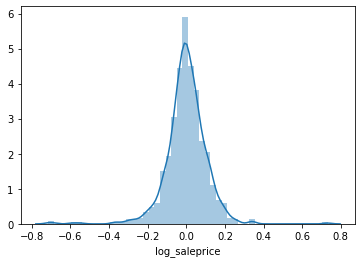

In [105]:
#residual analysis
sns.distplot(y_train-y_train_pred)

In [106]:
from sklearn import metrics 
r1=metrics.r2_score(y_test,y_test_pred)
print(r1)
r2=metrics.r2_score(y_train,y_train_pred)
print(r2)

-9.71213128175967e+18
0.9163691650385488


- here our model failed to predict unseen dataset i.e ovefitting
- so we need to choose regularised models i.e lasso,ridge,elastic net

## Lasso

In [107]:
from sklearn.linear_model import Lasso

In [108]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [109]:
y_train_pred=lasso.predict(X_train)

In [110]:
r1=metrics.r2_score(y_train,y_train_pred)
r1

0.7318370673761423

In [111]:
y_test_pred=lasso.predict(X_test)
r2=metrics.r2_score(y_test,y_test_pred)
r2

0.762782462038426

In [112]:
lasso.coef_

array([ 0.        ,  0.        ,  0.89945104,  0.        ,  0.0406921 ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.01297142,
        0.        ,  0.22402013,  0.        ,  0.34390848,  0.        ,
        0.        ,  0.        , -0.10065802,  0.        , -0.        ,
        0.05733969, -0.04817226,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.06966109,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.  

### Lets choose optimal Value of alpha using GridSearchcv

In [113]:
##grid search cv
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
folds=KFold(n_splits=5,shuffle=True,random_state=42)
##range of hyperparameters
params={'alpha':[0.001, 0.01, 1.0, 5.0, 10.0]}
##lasso model
model=Lasso()
##gridsearchcv
model_cv=GridSearchCV(estimator=model,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [114]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020014,0.012142,0.002099,0.004197,0.001,{'alpha': 0.001},0.877498,0.900364,0.843864,0.906402,...,0.853220,0.061660,1,0.893234,0.887722,0.898224,0.881007,0.903087,0.892655,0.007748
1,0.009374,0.007654,0.009718,0.007951,0.01,{'alpha': 0.01},0.701709,0.759540,0.684257,0.708653,...,0.720155,0.028329,2,0.733857,0.729084,0.738049,0.714648,0.747985,0.732725,0.010977
2,0.013803,0.007347,0.003125,0.006249,1,{'alpha': 1.0},-0.000102,-0.001656,-0.023927,-0.013982,...,-0.010084,0.008694,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.013802,0.007347,0.000000,0.000000,5,{'alpha': 5.0},-0.000102,-0.001656,-0.023927,-0.013982,...,-0.010084,0.008694,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.007552,0.007007,0.006251,0.007656,10,{'alpha': 10.0},-0.000102,-0.001656,-0.023927,-0.013982,...,-0.010084,0.008694,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


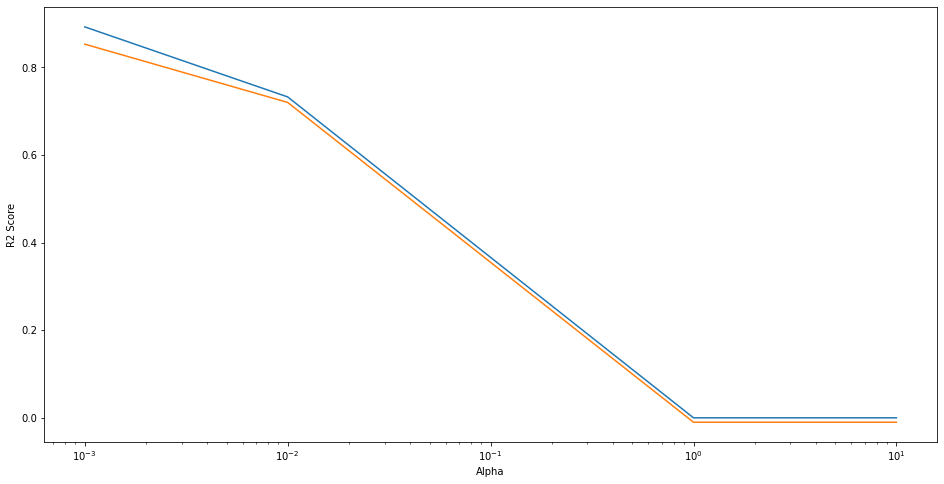

In [115]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [116]:
#check for alpha value
model_cv.best_params_

{'alpha': 0.001}

- optimal alpha value is 0.001

In [117]:
#  build model with optimal alpha
# lasso regression
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

# predict
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))

0.8887988414712454
0.8952837898597057


In [118]:
lasso.coef_

array([ 7.97656702e-02,  0.00000000e+00,  6.34393944e-01,  3.31006600e-01,
        1.08946647e-01,  0.00000000e+00,  0.00000000e+00,  3.36460050e-01,
        0.00000000e+00,  7.66017749e-02, -0.00000000e+00,  8.95439331e-01,
        1.56012261e-01,  1.95159551e-01,  1.16735405e-01,  5.58178765e-02,
        4.82952657e-02, -3.53599771e-01,  1.05671266e-01,  0.00000000e+00,
        7.88537983e-02, -0.00000000e+00, -0.00000000e+00,  9.73419820e-02,
       -1.79576343e-02, -2.96369454e-02,  9.12234110e-02,  2.55880563e-03,
        0.00000000e+00,  2.41669088e-02, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -3.69084999e-01,
       -8.73987307e-02,  0.00000000e+00,  0.00000000e+00, -1.02020682e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        6.53222168e-02,  0.00000000e+00, -2.04364727e-03,  0.00000000e+00,
        0.00000000e+00, -

In [119]:
model_param = list(lasso.coef_)

model_param
model_param.insert(0,lasso.intercept_)
cols = df_train.columns

cols=cols.insert(0,'constant')


lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [120]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)


,Featuere,Coef
0,constant,10.869585
12,BsmtCond,0.895439
3,LotArea,0.634394
8,MasVnrArea,0.336460
4,LotShape,0.331007
14,BsmtFinType1,0.195160
13,BsmtExposure,0.156012
66,Neighborhood_ClearCr,0.123353
15,BsmtFinSF1,0.116735
5,LandSlope,0.108947


In [121]:
## for subjective qns
##double value of alpha
# lasso regression
lasso2 = Lasso(alpha=0.002)
lasso2.fit(X_train,y_train)

# predict
y_train_pred = lasso2.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))
y_test_pred = lasso2.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))

0.8691672530299849
0.8868279437803576


In [122]:
##for subjective qns
model_param = list(lasso2.coef_)

model_param
model_param.insert(0,lasso2.intercept_)
cols = df_train.columns

cols=cols.insert(0,'constant')


lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [123]:
lasso_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
0,constant,10.927032
12,BsmtCond,0.797161
3,LotArea,0.679579
8,MasVnrArea,0.284724
4,LotShape,0.268088


## Ridge

In [124]:
from sklearn.linear_model import Ridge

In [125]:
ridge=Ridge(0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [126]:
y_train_pred=ridge.predict(X_train)

In [127]:
r1=metrics.r2_score(y_train,y_train_pred)
r1

0.9165090964603375

In [128]:
y_test_pred=ridge.predict(X_test)

In [129]:
r2=metrics.r2_score(y_test,y_test_pred)
r2

0.8910748761820089

## lets find out optimal value of alpha for ridge

In [130]:
folds=KFold(n_splits=5,shuffle=True,random_state=42)
##range of hyperparameters
params={'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}
##lasso model
model=Ridge()
##gridsearchcv
model_cv=GridSearchCV(estimator=model,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [131]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012316,0.006607,0.006194,0.005149,0.001,{'alpha': 0.001},0.887002,0.877326,0.867633,0.905640,...,0.846709,0.076423,8,0.919844,0.916722,0.921623,0.911105,0.926937,0.919246,0.005250
1,0.006250,0.007654,0.006249,0.007654,0.01,{'alpha': 0.01},0.886945,0.878329,0.867498,0.906258,...,0.847219,0.076143,7,0.919832,0.916713,0.921620,0.911093,0.926928,0.919237,0.005251
2,0.012500,0.006250,0.001302,0.002604,0.1,{'alpha': 0.1},0.886521,0.883996,0.866330,0.910759,...,0.850706,0.073761,6,0.919323,0.916248,0.921381,0.910491,0.926508,0.918790,0.005327
3,0.003125,0.006250,0.010678,0.006401,0.2,{'alpha': 0.2},0.886280,0.886972,0.865268,0.913768,...,0.853071,0.071675,5,0.918584,0.915476,0.920865,0.909520,0.925896,0.918068,0.005462
4,0.013807,0.003649,0.000000,0.000000,0.5,{'alpha': 0.5},0.885798,0.890969,0.862729,0.917367,...,0.856850,0.067021,3,0.916279,0.912936,0.918836,0.906448,0.924109,0.915721,0.005901
5,0.019401,0.007525,0.009154,0.005922,0.9,{'alpha': 0.9},0.885116,0.893036,0.859924,0.917275,...,0.858974,0.062470,2,0.913341,0.909755,0.916059,0.902754,0.921946,0.912771,0.006399
6,0.009382,0.007660,0.004426,0.006139,1,{'alpha': 1.0},0.884933,0.893340,0.859270,0.916899,...,0.859275,0.061495,1,0.912647,0.909016,0.915398,0.901917,0.921435,0.912083,0.006504
7,0.003125,0.006250,0.009376,0.007656,5,{'alpha': 5.0},0.875154,0.891288,0.836434,0.890261,...,0.855903,0.040041,4,0.891642,0.887085,0.895372,0.879778,0.903703,0.891516,0.008010
8,0.008864,0.006018,0.003118,0.006236,10,{'alpha': 10.0},0.859960,0.878338,0.810610,0.859883,...,0.842117,0.030214,9,0.870265,0.865045,0.874511,0.858911,0.882618,0.870270,0.008084
9,0.013804,0.007347,0.003125,0.006250,20,{'alpha': 20.0},0.827606,0.846959,0.764678,0.809137,...,0.809323,0.027810,10,0.831202,0.825478,0.836009,0.821323,0.842657,0.831334,0.007544


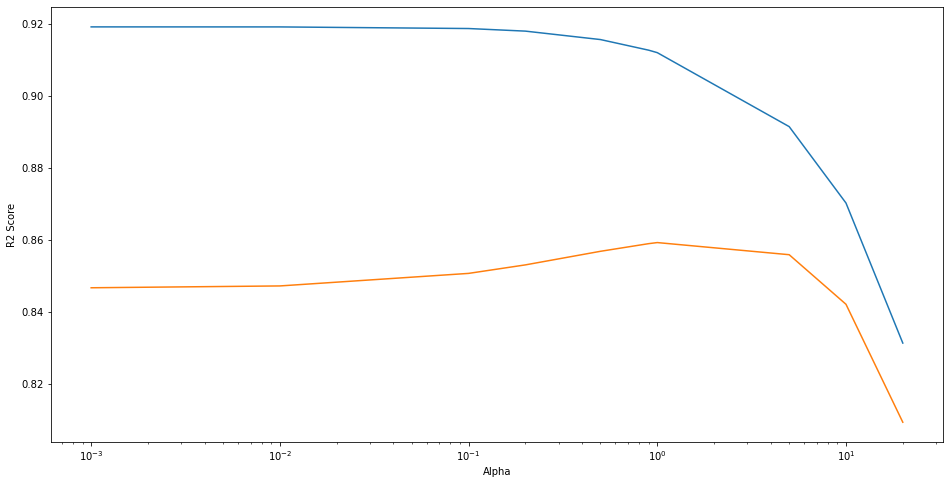

In [132]:
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [133]:
#check for alpha value
model_cv.best_params_

{'alpha': 1.0}

In [134]:
#  build model with optimal alpha
# lasso regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train,y_train)
# predict
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))

0.910286801545616
0.8974423721241649


In [135]:
model_param = list(ridge.coef_)

model_param
model_param.insert(0,ridge.intercept_)
cols = df_train.columns

cols=cols.insert(0,'constant')


ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']

In [136]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
0,constant,10.441409
3,LotArea,0.524851
12,BsmtCond,0.346740
4,LotShape,0.338254
9,ExterQual,0.331629
10,ExterCond,0.313739
19,TotalBsmtSF,0.290468
8,MasVnrArea,0.240643
21,CentralAir,0.225738
5,LandSlope,0.224950


In [137]:
# for subjective questions
# lasso regression
ridge2 = Ridge(alpha=2.0)
ridge2.fit(X_train,y_train)
# predict
y_train_pred = ridge2.predict(X_train)
print(metrics.r2_score(y_train,y_train_pred))
y_test_pred = ridge2.predict(X_test)
print(metrics.r2_score(y_test,y_test_pred))

0.905019805489392
0.8956548753282815


In [138]:
##for subjective qns
model_param = list(ridge2.coef_)

model_param
model_param.insert(0,ridge2.intercept_)
cols = df_train.columns

cols=cols.insert(0,'constant')


ridge_coef = pd.DataFrame(list(zip(cols,model_param)))
ridge_coef.columns = ['Featuere','Coef']

In [139]:
ridge_coef.sort_values(by='Coef',ascending=False).head(5)

,Featuere,Coef
0,constant,10.596399
3,LotArea,0.512611
12,BsmtCond,0.331468
4,LotShape,0.319271
9,ExterQual,0.310202


## Finally after creating model in both ridge and lasso, we can see that r2_score for ridge is (91/89) and for lasso is (88/89)

### optimal alpha value for Lasso:0.001
### optimal alpha value for Ridge:1.0

## Best Features explaining Dataset after comparing two models
   ### 1.BsmtCond	
   ### 2.LotArea
   ### 3.LotShape
   ### 4.MasVnrArea
   ### 5.ExterQual